# Predicting Stock values using Linear Regression 

In [47]:
%matplotlib inline

import pandas as pd
import numpy as np
import Quandl
import math, datetime
from sklearn import preprocessing
from sklearn import cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Creating a dataframe for the stock values dataset from Quandl

In [75]:
df = Quandl.get('WIKI/GOOGL')
df.head

<bound method NDFrame.head of               Open      High       Low   Close    Volume  Ex-Dividend  \
Date                                                                    
2004-08-19  100.00  104.0600   95.9600  100.34  44659000            0   
2004-08-20  101.01  109.0800  100.5000  108.31  22834300            0   
2004-08-23  110.75  113.4800  109.0500  109.40  18256100            0   
2004-08-24  111.24  111.6000  103.5700  104.87  15247300            0   
2004-08-25  104.96  108.0000  103.8800  106.00   9188600            0   
2004-08-26  104.95  107.9500  104.6600  107.91   7094800            0   
2004-08-27  108.10  108.6200  105.6900  106.15   6211700            0   
2004-08-30  105.28  105.4900  102.0100  102.01   5196700            0   
2004-08-31  102.30  103.7100  102.1600  102.37   4917800            0   
2004-09-01  102.70  102.9700   99.6700  100.25   9138200            0   
2004-09-02   99.19  102.3700   98.9400  101.51  15118600            0   
2004-09-03  100.95  1

In [71]:
df.describe()

,Adj. Close,HC_PCT,PCT_change,Adj. Volume
count,2928.000000,2928.000000,2928.000000,2928.000000
mean,326.751203,230.022960,226.751203,8845573.747268
std,168.947890,170.142039,168.947890,8494328.879982
min,50.005000,-49.130000,-49.995000,521141.000000
25%,215.380000,118.918750,115.380000,3665750.000000
50%,278.707500,182.427500,178.707500,6054400.000000
75%,427.055000,330.998750,327.055000,11587425.000000
max,793.960000,710.350000,693.960000,82151100.000000


# Choosing important features:

Here we will try to predict the close price for our stock, so we tried to choose all the changing price features to manipualte .

In [49]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]
df.describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,326.906779,330.022960,323.426049,326.751203,8845573.747268
std,169.057922,170.142039,167.646566,168.947890,8494328.879982
min,49.595000,50.870000,47.980000,50.005000,521141.000000
25%,215.063750,218.918750,212.458750,215.380000,3665750.000000
50%,279.185000,282.427500,275.205000,278.707500,6054400.000000
75%,427.355000,430.998750,423.901250,427.055000,11587425.000000
max,800.500000,810.350000,787.200000,793.960000,82151100.000000


Creating new feature:

1- The change between the highest and the close value per day.

2- The change between the close and the opening value per day.

In [69]:
df['HC_PCT'] = df['Adj. High'] - df['Adj. Close'] / df['Adj. Close']*100.0
print (df['HC_PCT'])
df['PCT_change'] = df['Adj. Close'] - df['Adj. Open'] / df['Adj. Open']*100.0
print (df['PCT_change'])

Date
2004-08-19    -47.9700
2004-08-20    -45.4600
2004-08-23    -43.2600
2004-08-24    -44.2000
2004-08-25    -46.0000
2004-08-26    -46.0250
2004-08-27    -45.6900
2004-08-30    -47.2550
2004-08-31    -48.1450
2004-09-01    -48.5150
2004-09-02    -48.8150
2004-09-03    -49.1300
2004-09-07    -49.0000
2004-09-08    -48.4850
2004-09-09    -48.6450
2004-09-10    -46.7200
2004-09-13    -45.7950
2004-09-14    -44.0000
2004-09-15    -42.8850
2004-09-16    -42.1000
2004-09-17    -41.2550
2004-09-20    -39.2000
2004-09-21    -39.7900
2004-09-22    -40.1650
2004-09-23    -38.6850
2004-09-24    -37.9500
2004-09-27    -39.5600
2004-09-28    -36.3000
2004-09-29    -32.4900
2004-09-30    -33.8500
                ...   
2016-03-11    644.9000
2016-03-14    654.2600
2016-03-15    653.0100
2016-03-16    659.0000
2016-03-17    665.3400
2016-03-18    662.1400
2016-03-21    663.3400
2016-03-22    665.0000
2016-03-23    665.3900
2016-03-24    657.5550
2016-03-28    658.3000
2016-03-29    667.1800
2016-0

Now we will recreate our dataframe and include our new features.

In [70]:
df = df[['Adj. Close', 'HC_PCT', 'PCT_change', 'Adj. Volume']]
df.describe()

,Adj. Close,HC_PCT,PCT_change,Adj. Volume
count,2928.000000,2928.000000,2928.000000,2928.000000
mean,326.751203,230.022960,226.751203,8845573.747268
std,168.947890,170.142039,168.947890,8494328.879982
min,50.005000,-49.130000,-49.995000,521141.000000
25%,215.380000,118.918750,115.380000,3665750.000000
50%,278.707500,182.427500,178.707500,6054400.000000
75%,427.055000,330.998750,327.055000,11587425.000000
max,793.960000,710.350000,693.960000,82151100.000000


# Creating our Label


The label is the value we are trying to predict and we are shifting our column back by 0.01 of the column length.

You can change the value according to your prediction, but here I find 30 days very suffecient .

In [52]:
forecast_col = 'Adj. Close'
df.fillna(-9999, inplace=True)

In [53]:
forecast_out = int(math.ceil(0.01*len(df)))
print (forecast_out)

30


In [77]:
df['label'] = df[forecast_col].shift(-forecast_out)
print (df['label'])
print (df.head())
print (df[forecast_col])

df[:-forecast_out]

Date
2004-08-19    66.290
2004-08-20    67.530
2004-08-23    69.185
2004-08-24    68.540
2004-08-25    69.425
2004-08-26    68.865
2004-08-27    67.630
2004-08-30    68.700
2004-08-31    70.450
2004-09-01    71.000
2004-09-02    72.055
2004-09-03    74.580
2004-09-07    73.970
2004-09-08    70.245
2004-09-09    74.690
2004-09-10    86.215
2004-09-13    93.700
2004-09-14    90.900
2004-09-15    92.985
2004-09-16    96.650
2004-09-17    95.320
2004-09-20    98.015
2004-09-21    97.435
2004-09-22    95.835
2004-09-23    92.350
2004-09-24    84.675
2004-09-27    86.275
2004-09-28    84.350
2004-09-29    83.930
2004-09-30    91.510
               ...  
2016-03-11       NaN
2016-03-14       NaN
2016-03-15       NaN
2016-03-16       NaN
2016-03-17       NaN
2016-03-18       NaN
2016-03-21       NaN
2016-03-22       NaN
2016-03-23       NaN
2016-03-24       NaN
2016-03-28       NaN
2016-03-29       NaN
2016-03-30       NaN
2016-03-31       NaN
2016-04-01       NaN
2016-04-04       NaN
2016-04-

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,label
Date,,,,,,,,,,,,,
2004-08-19,100.000,104.0600,95.9600,100.34,44659000,0,1,50.000,52.0300,47.9800,50.170,44659000,66.290
2004-08-20,101.010,109.0800,100.5000,108.31,22834300,0,1,50.505,54.5400,50.2500,54.155,22834300,67.530
2004-08-23,110.750,113.4800,109.0500,109.40,18256100,0,1,55.375,56.7400,54.5250,54.700,18256100,69.185
2004-08-24,111.240,111.6000,103.5700,104.87,15247300,0,1,55.620,55.8000,51.7850,52.435,15247300,68.540
2004-08-25,104.960,108.0000,103.8800,106.00,9188600,0,1,52.480,54.0000,51.9400,53.000,9188600,69.425
2004-08-26,104.950,107.9500,104.6600,107.91,7094800,0,1,52.475,53.9750,52.3300,53.955,7094800,68.865
2004-08-27,108.100,108.6200,105.6900,106.15,6211700,0,1,54.050,54.3100,52.8450,53.075,6211700,67.630
2004-08-30,105.280,105.4900,102.0100,102.01,5196700,0,1,52.640,52.7450,51.0050,51.005,5196700,68.700
2004-08-31,102.300,103.7100,102.1600,102.37,4917800,0,1,51.150,51.8550,51.0800,51.185,4917800,70.450


Scaling our data to make sure they have the same scale and creating our array .

In [78]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
#print X, X_lately

df.dropna(inplace=True)
y = np.array(df['label'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Splitting our data into training and testing data using cross validation and we set our test data to be 20% of the data set.

Then, we create our model using Linear Regression 

In [79]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2 )

In [57]:
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
forecast_set = clf.predict(X_lately)
print (forecast_set, accuracy, forecast_out)

[ 753.57994127  766.18672253  775.29606981  783.56608261  752.12998988
  734.27328728  707.98228476  709.40007253  705.87084278  712.24461536
  711.94316003  712.77412644  723.59462883  737.74327132  723.03095483
  728.28240051  734.98598595  723.06001101  727.07700372  735.21714411
  730.57688789  722.95720121  747.62782119  745.39047411  737.32819025
  735.94454967  718.155186    719.26191962  731.48451696  737.94935561] 0.960625331867 30


In [58]:
df['forecast'] = np.nan


Here we are just trying to modify the dates in the dataset and plotting it in our graph 

In [59]:
#from datetime import timestamp
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [60]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    

# Finally

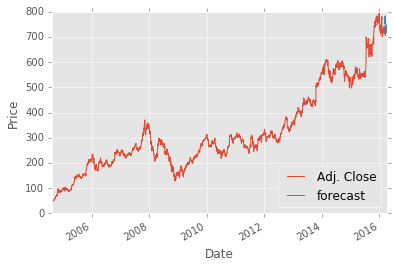

In [61]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()